In [45]:
# Add name, date, notebook assignment

# Notebook 3 — Weighted Linear Regression (Beginner Version)

Goal: Use per-point measurement uncertainties (SEM) to perform a weighted fit of $y=a+bx$, compute parameter uncertainties (standard error of $a$ and $b$) and covariance, and make informative plots (confidence/prediction bands, residuals, covariance ellipse).

## Theory Primer — Why Weighted Fits?

Some points are measured more precisely than others. If each mean value $y_i$ at $x_i$ has an uncertainty $\sigma_i$ (for example, the SEM from Notebook 2), we can give that point a weight $w_i = 1/\sigma_i^2$. 

Assuming that all $x_i$ are measured perfectly (as is approximately the case for a physics experiment, though hardly ever for natural "experiments"), we can then measure if our model

$y=a+bx$ 

works well by computing the $\chi^2$ ("chi-square") misfit for $N$ data

$
\chi^2(a,b) = \sum_{i=1}^N \left(\frac{y_i-a-b x_i}{\sigma_i}\right)^2.
$

This misfit metric uses data weighted by error squared. Other choices are possible, with various benefits and drawbacks. $\chi^2$ metrics have well understood behavior. For example, if $M$ is the number of parameters (here $M=2$, $a$ and $b$), then 

$
\nu = N-M
$

is the number of degrees of freedom, with which we expect $\chi^2 \sim \nu$ for a "moderately" good fit (e.g. Numerical Recipes, sec. 15.1).

We can see to minimize $\chi^2$ by varying $a$ and $b$ any way we like, e.g. by trying out plausible numbers given our prior knowledge about $a$ and $b$ (a "Bayesian" approach), or we can write down the analytical, least squares line fit with errors in $y$ version based on a number of sums (see, e.g., Numerical Recipes, chap. 15.2)

$
S = \Sigma w_i,\quad S_x = \Sigma w_i x_i, \quad S_y = \Sigma w_i y_i,\quad S_{xx} = \Sigma w_i x_i^2,\quad S_{xy} = \Sigma w_i x_i y_i.
$

and then the best fit parameters result as:

$
b = \frac{S S_{xy} - S_x S_y}{\Delta}, a = \frac{S_{xx} S_y - S_x S_{xy}}{\Delta},\quad\mathrm{where}\quad \Delta = S S_{xx} - S_x^2.
$

One can show that the variances (error estimates squared) for the parameters themselves in this case are given by

$
\sigma_a^2 = \frac{S_{xx}}{\Delta}
$

and

$
\sigma_b^2 = \frac{S}{\Delta}.
$

Also important is that those two errors, for abscissae, $a$, and slope, $b$, are not independent necessarily, but vary together with the covariance given by 

$
\mathrm{Cov}(a,b) = -\frac{S_x}{\Delta}
$

or the correlation between $a$ and $b$

$
r_{ab} = \frac{-S_x}{\sqrt{SS_{xx}}}
$

if $r_{a,b} \sim 0 $, then both are independently constrained (poorly or well, depending on $\sigma_a$ and $\sigma_b$), if $|r_{a,b}|\sim 1$, then only the ratio of $a/b$ might be constrained. What $\sigma_{a,b}$ and $r_{a,b}$ result from the data is not only determined by the individual errors for $y_i$, $\sigma_i$, but also where those points are sampled (draw a bunch of points to the left and right and centered on $x=0$ and think about this). 


## Importing Data from a CSV
Use the pandas library to import the "Austin_Population_1999_2025.csv" dataset into this notebook

In [3]:
import pandas as pd

#Example 
pop = pd.read_csv("Austin_Population_1999_2025.csv")

## <span style="font-size: 18px; font-weight: bold;">Explore the Data by running the cells below</span>

- Use .head() to examine the data. 

- Print the column names 

In [4]:
#the variable before the . is what you named the contents of the csv file above
pop.head()

,"Austin Population by Year, https://www.macrotrends.net/global-metrics/cities/22926/austin/population",Unnamed: 1
0,Year,Population
1,2025,2313000
2,2024,2274000
3,2023,2228000
4,2022,2176000


When we import the data, sometimes there are rows that we do not want to include in the dataframe. Lets try importing it again, this time skipping the first row....

In [5]:
pop = pd.read_csv("Austin_Population_1999_2025.csv", skiprows = 1) # pop is the name of the dataframe

In [49]:
#view the imported data
pop.head()

,Year,Population
0,2025,2313000
1,2024,2274000
2,2023,2228000
3,2022,2176000
4,2021,2117000


In [6]:
print(pop.columns)

Index(['Year', 'Population'], dtype='object')


## <span style="font-size: 18px; font-weight: bold;">Plot the Data</span>

- Import the matplotlib.pyplot library 


In [7]:
#run this cell 
import matplotlib.pyplot as plt

## <span style="font-size: 18px; font-weight: bold;">Let's Create a Simple Plot</span>

Plot the population size of Austin by year

Label the x-axis as "Year" and the y-axis as "Population Size"

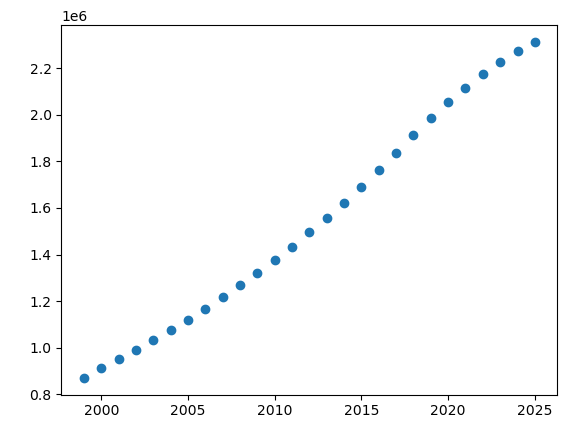

In [8]:
# Plot the 2033 Average Temperature vs. Month
plt.scatter(pop['Year'], pop['Population'])

plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

## 1. Although the above chart displays datapoints, this would not be a good deliverable. Why not? What would you change to make this plot more informative for a lab report? 


## 2. Edit the plot (using the code below)

- Add a line connecting each of the data points
- Label what the data is using 'label =     '
- Make the color of the points red
- Add a title

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


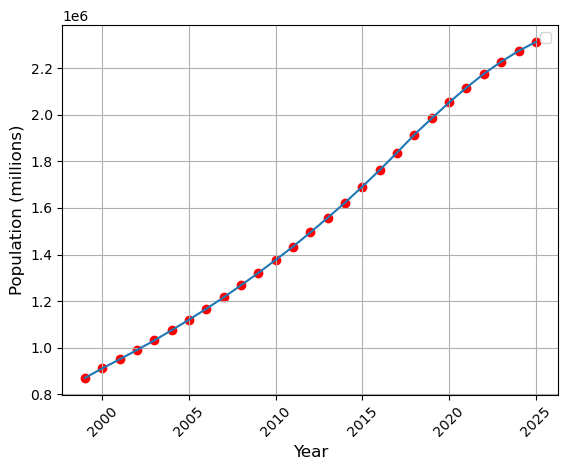

In [9]:
plt.scatter(pop['Year'], pop['Population'], color='red', label='') #add the color and label

# plt.plot adds a line graph connecting the points  
plt.plot( pop['Year'], pop['Population'] ) #ADD CODE HERE


plt.xlabel("Year", fontsize=12)  # fontsize increases font size for x-axis label
plt.ylabel("Population (millions)", fontsize=12)  # similarly, this increases the font size for the y axis 

#ADD a TITLE

plt.xticks(rotation=45)  # Rotate x-axis for readability since the months' names are long 
plt.legend(fontsize=10)  # this plots a legend with the specified font size 
plt.grid(True) #adds a grid for visibility 

# Display the plot
plt.show()


# Linear Regression

Lets import a new dataset and perform a weighted linear regression

## 3. Import the 'Austin_Temperature_Data.csv'

Use the pandas library to import the dataset as we did with the population data.

In [10]:
data = pd.read_csv("Austin_Temperature_Data.csv") # data is the name of the dataframe

In [11]:
# view the imported data
data.head()

,Month,2000 Average Temp,2010 Average Temp,2023 Average Temp
0,January,56.6,52.0,63.5
1,February,56.7,56.5,67.3
2,March,65.8,64.0,74.5
3,April,68.5,70.0,76.5
4,May,77.0,77.0,84.2


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              12 non-null     object 
 1   2000 Average Temp  12 non-null     float64
 2   2010 Average Temp  12 non-null     float64
 3   2023 Average Temp  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 516.0+ bytes


## 4. Plot the Average monthly temperatures versus Month as a scatter plot for 2023.
Make sure to label the axis (rotate if needed for readability, and add a title. 

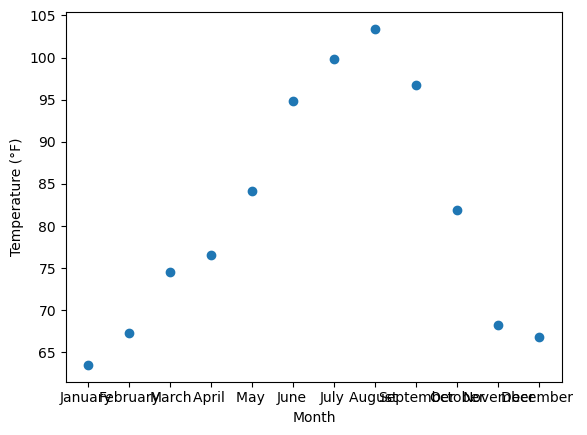

In [13]:
# Plot the 2033 Average Temperature vs. Month
# EDIT THE CODE BELOW
plt.scatter(data['Month'], data['2023 Average Temp'])

plt.xlabel("Month")
plt.ylabel("Temperature (°F)")
plt.show()

# Import libraries to compute SEM from replicates temperature measurements

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Lets work with data from January to August, where temperature increases each month

In [15]:
jan_aug = data.loc[0:7] #makes a new dataframe of jan - aug
jan_aug = jan_aug.reset_index(drop=True)

jan_aug

,Month,2000 Average Temp,2010 Average Temp,2023 Average Temp
0,January,56.6,52.0,63.5
1,February,56.7,56.5,67.3
2,March,65.8,64.0,74.5
3,April,68.5,70.0,76.5
4,May,77.0,77.0,84.2
5,June,86.4,84.0,94.8
6,July,90.8,87.0,99.8
7,August,91.1,88.0,103.4


In [16]:
#convert dataframe to a dictionary
# each month has three measurements of average temperature from 2000, 2010, and 2023
replicates = {
    float(i + 1): [
        row["2000 Average Temp"],
        row["2010 Average Temp"],
        row["2023 Average Temp"]
    ]
    for i, row in jan_aug.iterrows()
}

In [17]:
print(replicates)

{1.0: [56.6, 52.0, 63.5], 2.0: [56.7, 56.5, 67.3], 3.0: [65.8, 64.0, 74.5], 4.0: [68.5, 70.0, 76.5], 5.0: [77.0, 77.0, 84.2], 6.0: [86.4, 84.0, 94.8], 7.0: [90.8, 87.0, 99.8], 8.0: [91.1, 88.0, 103.4]}


## Compute the Mean and SEM for each month

In [18]:

x_list = []; y_mean_list = []; sigma_list = []
for xi, ys in replicates.items():
    m = len(ys)
    mean_y = sum(ys) / m
    variance = sum((y - mean_y)**2 for y in ys) / (m - 1)
    std_y = math.sqrt(variance)
    sem_y = std_y / math.sqrt(m)
    x_list.append(xi); y_mean_list.append(mean_y); sigma_list.append(sem_y)
x = np.array(x_list); y = np.array(y_mean_list); sigma = np.array(sigma_list)
order = np.argsort(x); x = x[order]; y = y[order]; sigma = sigma[order]
print('x (Month) =', x)
print('y (mean temp) =', y)
print('sigma (SEM) =', sigma)


x (Month) = [1. 2. 3. 4. 5. 6. 7. 8.]
y (mean temp) = [57.36666667 60.16666667 68.1        71.66666667 79.4        88.4
 92.53333333 94.16666667]
sigma (SEM) = [3.34182252 3.56713393 3.24191302 2.45515331 2.4        3.27414111
 3.79531875 4.70259975]


## Weighted fit (by hand) and parameter uncertainties

Now that we estimated the errors for each $y_i$ by computing the mean (for the best estimate) and standard deviation (or variance) for each sample to get $\sigma_i$, we can use the equations for the weighted line fit from the beginning of the exercise. 

In [35]:
w = 1.0 / (sigma**2) #weight of each point

#weighted sums
S = float(np.sum(w)) 
Sx = float(np.sum(w * x))
Sy = float(np.sum(w * y))
Sxx = float(np.sum(w * x**2))
Sxy = float(np.sum(w * x * y))

Delta = S * Sxx - Sx**2

#solve for best fit parameters
b = (S * Sxy - Sx * Sy) / Delta
a = (Sxx * Sy - Sx * Sxy) / Delta

## 5. What are the best fit slope and intercept? Print the results

## 6. Plot the data with errorbars and the fit 
Edit the code below to include axis labels, etc. 

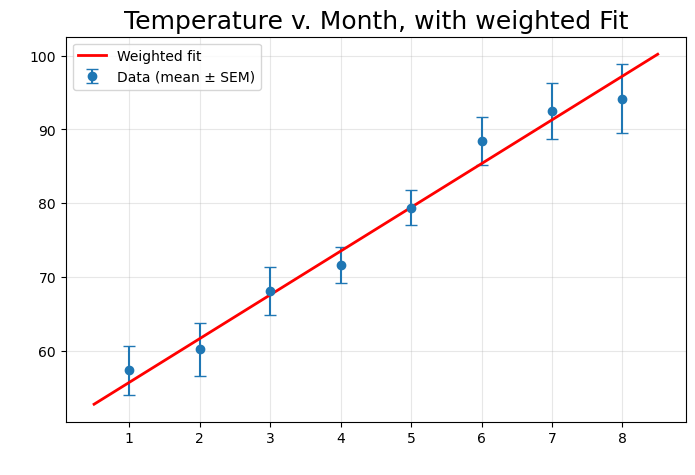

In [20]:
x_grid = np.linspace(float(x.min()) - 0.5, float(x.max()) + 0.5, 200) #makes a list of x data, slightly longer than our dataset
y_fit = a + b * x_grid #solves for the best fit, using slope / intercept from our calculation

plt.figure(figsize=(8,5))

plt.errorbar(x, y, yerr=sigma, fmt='o', capsize=4, label='Data (mean ± SEM)')
plt.plot(x_grid, y_fit, 'r-', lw=2, label='Weighted fit')

plt.xlabel('  ') #add label
plt.ylabel('  ') #add label

plt.title('Temperature v. Month, with weighted Fit', fontsize = 18)
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


## 6. Compute the residuals

Reminder from notebook2, Residuals: r_i = y_i - (a + b x_i).

In [21]:
#compute the residuals
res = y - (a + b * x)
print(res)

[ 1.65338878 -1.47766333  0.5246179  -1.83976754 -0.03748632  3.03146157
  1.2337428  -3.06397598]


## 7. Plot the weighted residuals
Modify the code below

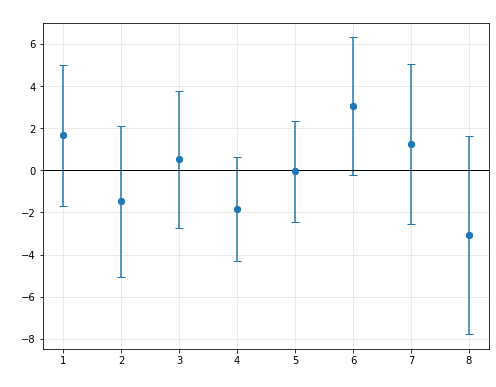

In [66]:
plt.figure(figsize=(8,6))

plt.scatter(x, res ) #plot x versus residuals 'res'

plt.errorbar(x, res, yerr=sigma, fmt='o', capsize=4)
plt.axhline(0, color='k', lw=1)

plt.xlabel('  ')
plt.ylabel('  ')

plt.title(' ') #add a tile
plt.grid(True, alpha=0.3); plt.show()

### Compute chi-squared, and extract uncertainty in a and b [SE(a) and SE(b)]

In [36]:
#compute chi-squared, and extract uncertainty in a and b (SE(a) and SE(b))
chi2 = float(np.sum((res / sigma)**2)); 
# reduceed chi2
nu = len(x) - 2; red_chi2 = chi2 / nu
Cov_known = (1.0 / Delta) * np.array([[Sxx, -Sx], [-Sx, S]])
Cov_scaled = Cov_known * red_chi2
se_a = float(np.sqrt(Cov_scaled[0,0])); se_b = float(np.sqrt(Cov_scaled[1,1])); cov_ab = float(Cov_scaled[0,1])

print('SE(a) =', se_a); print('SE(b) =', se_b); print('Cov(a,b) =', cov_ab)
print('chi^2 =', chi2, ' reduced chi^2 =', red_chi2)


SE(a) = 1.1449529485280878
SE(b) = 0.3330733981957654
Cov(a,b) = -0.3261169825531445
chi^2 = 4.217459620910234  reduced chi^2 = 0.7029099368183723


## (Optional) Package method — NumPy polyfit (with weights)

In [23]:
coeffs, cov = np.polyfit(x, y, 1, w=1.0/sigma, cov=True)
b_np, a_np = coeffs
se_b_np = float(np.sqrt(cov[0,0])); se_a_np = float(np.sqrt(cov[1,1])); cov_ab_np = float(cov[1,0])
print('polyfit: a =', a_np, ' b =', b_np)
print('polyfit: SE(a) =', se_a_np, ' SE(b) =', se_b_np, ' Cov(a,b) =', cov_ab_np)


polyfit: a = 49.782225774962335  b = 5.931052108611626
polyfit: SE(a) = 1.7002414778807475  SE(b) = 0.36175196221975764  Cov(a,b) = -0.5603209714196411


### Compute Confidence and Prediction Intervals

In [25]:
# Key = degrees of freedom (df), Value = t_critical
t95 = {1:12.706, 2:4.303, 3:3.182, 4:2.776, 5:2.571,
    6:2.447, 7:2.365, 8:2.306, 9:2.262, 10:2.228,
    15:2.131, 20:2.086, 25:2.060, 30:2.042
}

df = len(x) - 2 # Compute degrees of freedom for linear regression (n - 2)

t_star = t95.get(df, 1.96) # Get the t critical value from the table; default to 1.96 if df not in table

# Function to compute standard error of the mean predicted value at x0
def se_mean_at(x0, Cov):
    v = np.array([1.0, float(x0)])
    return float(np.sqrt(v @ Cov @ v))

sigma_new = float(np.mean(sigma)) # Compute typical measurement scatter 

# Function to compute standard error of a new predicted observation at x0
def se_pred_at(x0, Cov):
    return float(np.sqrt(se_mean_at(x0, Cov)**2 + sigma_new**2))

# Compute standard errors of the mean predictions across all points in x_grid
se_mean_grid = np.array([se_mean_at(x0, Cov_scaled) for x0 in x_grid])

# Compute standard errors for prediction intervals across x_grid
se_pred_grid = np.array([se_pred_at(x0, Cov_scaled) for x0 in x_grid])

# Compute lower and upper bounds of the 95% confidence interval for the fitted line
y_ci_low  = y_fit - t_star * se_mean_grid
y_ci_high = y_fit + t_star * se_mean_grid

# Compute lower and upper bounds of the 95% prediction interval for new observations
y_pi_low  = y_fit - t_star * se_pred_grid
y_pi_high = y_fit + t_star * se_pred_grid

## 8. Plot the data with Confidence and Prediction Intervals
Modify the code below.

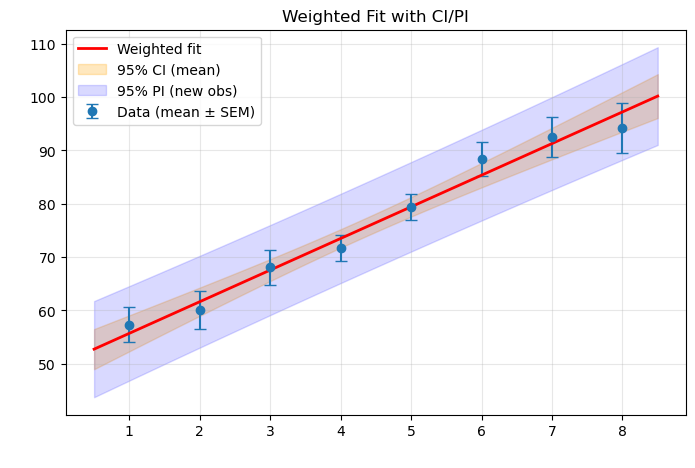

In [26]:
plt.figure(figsize=(8,5))

# plt.errorbar( ) #add code for data points with errorbars
# plt.plot( ) # add code for the best fit line (in red)

plt.errorbar(x, y, yerr=sigma, fmt='o', capsize=4, label='Data (mean ± SEM)')
plt.plot(x_grid, y_fit, 'r-', lw=2, label='Weighted fit')

plt.fill_between(x_grid, y_ci_low, y_ci_high, color='orange', alpha=0.25, label='95% CI (mean)') #confidence interval
plt.fill_between(x_grid, y_pi_low, y_pi_high, color='blue', alpha=0.15, label='95% PI (new obs)') #prediction interval

plt.xlabel(' ') 
plt.ylabel(' ')

plt.title('Weighted Fit with CI/PI')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 9. What does the confidence interval represent? 

## 10. How is the prediction interval different from the confidence interval? 

## Covariance Ellipse
Another useful plot to visualize uncertainty in our fit is a covariance ellipse. 

In the linear fit 𝑦 = 𝑎 + 𝑏𝑥, the covariance ellipse shows the joint uncertainty of the intercept and slope. 

The width of the ellipse along the a-axis reflects the uncertainty in the intercept.
The height along the b-axis reflects the uncertainty in the slope.

The tilt of the ellipse shows the correlation: if the ellipse is slanted downward, a larger intercept tends to correspond to a smaller slope, which is typical in regression.

All points inside the ellipse represent combinations of (a,b) that are statistically consistent with the data and the weighted linear fit. The ellipse gives a visual sense of how precisely the line is determined and how the slope and intercept uncertainties are related.

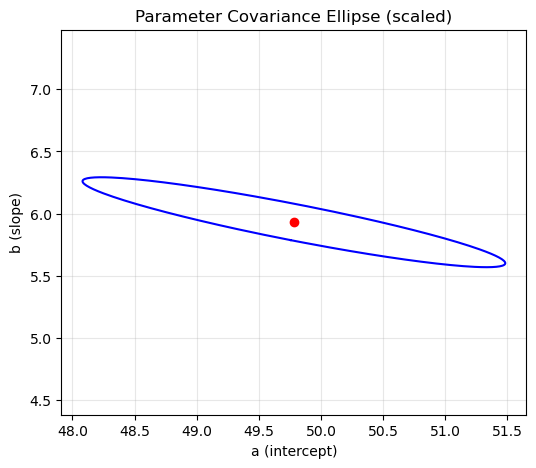

In [27]:
vals, vecs = np.linalg.eigh(Cov_scaled)
theta = np.linspace(0, 2*np.pi, 200); circle = np.stack([np.cos(theta), np.sin(theta)])
ellipse = (vecs @ np.diag(np.sqrt(vals)) @ circle).T

plt.figure(figsize=(6,5))
plt.plot(a + ellipse[:,0], b + ellipse[:,1], 'b-'); plt.plot([a], [b], 'ro')
plt.xlabel('a (intercept)'); plt.ylabel('b (slope)')
plt.title('Parameter Covariance Ellipse (scaled)')
plt.axis('equal'); plt.grid(True, alpha=0.3); plt.show()

## Lets assume the error for January is much larger
Multiply the SEM by 2

In [72]:
sigma[0] # this is the current SEM for January

3.341822523381183

## 11. Double the SEM for January

In [28]:
sigma[0] = sigma[0]*2  #enter code here to couble sigma[0]

## Recompute 

In [29]:
w = 1.0 / (sigma**2) #weight of each point

#weighted sums
S = float(np.sum(w)) 
Sx = float(np.sum(w * x))
Sy = float(np.sum(w * y))
Sxx = float(np.sum(w * x**2))
Sxy = float(np.sum(w * x * y))

Delta = S * Sxx - Sx**2

#solve for best fit parameters
b = (S * Sxy - Sx * Sy) / Delta
a = (Sxx * Sy - Sx * Sxy) / Delta

res = y - (a + b * x) #residuals

#compute chi-squared, and extract uncertainty in a and b (SE(a) and SE(b))
chi2 = float(np.sum((res / sigma)**2)); nu = len(x) - 2; red_chi2 = chi2 / nu
Cov_known = (1.0 / Delta) * np.array([[Sxx, -Sx], [-Sx, S]])
Cov_scaled = Cov_known * red_chi2
se_a = float(np.sqrt(Cov_scaled[0,0])); se_b = float(np.sqrt(Cov_scaled[1,1])); cov_ab = float(Cov_scaled[0,1])

print('SE(a) =', se_a); print('SE(b) =', se_b); print('Cov(a,b) =', cov_ab)
print('chi^2 =', chi2, ' reduced chi^2 =', red_chi2)

SE(a) = 1.9386841890415254
SE(b) = 0.3957731847601953
Cov(a,b) = -0.7170952765768887
chi^2 = 2.1216879522847494  reduced chi^2 = 0.3536146587141249


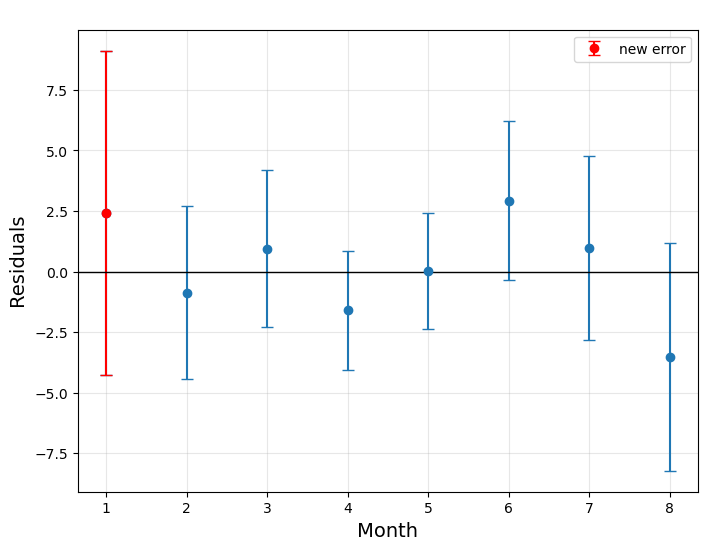

In [30]:
plt.figure(figsize=(8,6))

plt.errorbar(x, res, yerr=sigma, fmt='o', capsize=4)
plt.errorbar(x[0], res[0], yerr=sigma[0], color = 'red',fmt='o', capsize=4, label = 'new error')

plt.axhline(0, color='k', lw=1)

plt.xlabel(' Month ', fontsize = 14)
plt.ylabel(' Residuals ', fontsize = 14)

plt.title(' ') #add a tile
plt.legend()
plt.grid(True, alpha=0.3); plt.show()

## 12. How do SE(a) and SE(b) change when SEM for January doubles? 

## What happens when we get More Data!?!
Assume we just got data for 9 more years for the Months of January, February, and March

In [31]:
# Months to double: 1=Jan, 2=Feb, 3=Mar
months_to_double = [1.0, 2.0, 3.0]

for month in months_to_double:
    replicates[month] = replicates[month] + replicates[month] + replicates[month]+ replicates[month] # duplicate measurements


### Recompute

In [32]:
x_list = []; y_mean_list = []; sigma_list = []
for xi, ys in replicates.items():
    m = len(ys)
    mean_y = sum(ys) / m
    variance = sum((y - mean_y)**2 for y in ys) / (m - 1)
    std_y = math.sqrt(variance)
    sem_y = std_y / math.sqrt(m)
    x_list.append(xi); y_mean_list.append(mean_y); sigma_list.append(sem_y)
x = np.array(x_list); y = np.array(y_mean_list); sigma = np.array(sigma_list)
order = np.argsort(x); x = x[order]; y = y[order]; sigma = sigma[order]

w = 1.0 / (sigma**2) #weight of each point

#weighted sums
S = float(np.sum(w)) 
Sx = float(np.sum(w * x))
Sy = float(np.sum(w * y))
Sxx = float(np.sum(w * x**2))
Sxy = float(np.sum(w * x * y))

Delta = S * Sxx - Sx**2

#solve for best fit parameters
b = (S * Sxy - Sx * Sy) / Delta
a = (Sxx * Sy - Sx * Sxy) / Delta

res = y - (a + b * x) #residuals

#compute chi-squared, and extract uncertainty in a and b (SE(a) and SE(b))
chi2 = float(np.sum((res / sigma)**2)); nu = len(x) - 2; red_chi2 = chi2 / nu
Cov_known = (1.0 / Delta) * np.array([[Sxx, -Sx], [-Sx, S]])
Cov_scaled = Cov_known * red_chi2
se_a = float(np.sqrt(Cov_scaled[0,0])); se_b = float(np.sqrt(Cov_scaled[1,1])); cov_ab = float(Cov_scaled[0,1])

print('SE(a) =', se_a); print('SE(b) =', se_b); print('Cov(a,b) =', cov_ab)
print('chi^2 =', chi2, ' reduced chi^2 =', red_chi2)

# Key = degrees of freedom (df), Value = t_critical
t95 = {1:12.706, 2:4.303, 3:3.182, 4:2.776, 5:2.571,
    6:2.447, 7:2.365, 8:2.306, 9:2.262, 10:2.228,
    15:2.131, 20:2.086, 25:2.060, 30:2.042
}

df = len(x) - 2 # Compute degrees of freedom for linear regression (n - 2)

t_star = t95.get(df, 1.96) # Get the t critical value from the table; default to 1.96 if df not in table

# Function to compute standard error of the mean predicted value at x0
def se_mean_at(x0, Cov):
    v = np.array([1.0, float(x0)])
    return float(np.sqrt(v @ Cov @ v))

sigma_new = float(np.mean(sigma)) # Compute typical measurement scatter 

# Function to compute standard error of a new predicted observation at x0
def se_pred_at(x0, Cov):
    return float(np.sqrt(se_mean_at(x0, Cov)**2 + sigma_new**2))

# Compute standard errors of the mean predictions across all points in x_grid
se_mean_grid = np.array([se_mean_at(x0, Cov_scaled) for x0 in x_grid])

# Compute standard errors for prediction intervals across x_grid
se_pred_grid = np.array([se_pred_at(x0, Cov_scaled) for x0 in x_grid])

# Compute lower and upper bounds of the 95% confidence interval for the fitted line
y_ci_low  = y_fit - t_star * se_mean_grid
y_ci_high = y_fit + t_star * se_mean_grid

# Compute lower and upper bounds of the 95% prediction interval for new observations
y_pi_low  = y_fit - t_star * se_pred_grid
y_pi_high = y_fit + t_star * se_pred_grid

SE(a) = 1.1449529485280878
SE(b) = 0.3330733981957654
Cov(a,b) = -0.3261169825531445
chi^2 = 4.217459620910234  reduced chi^2 = 0.7029099368183723


## 13. Plot the Confidence Interval and Prediction intervals for the updated data

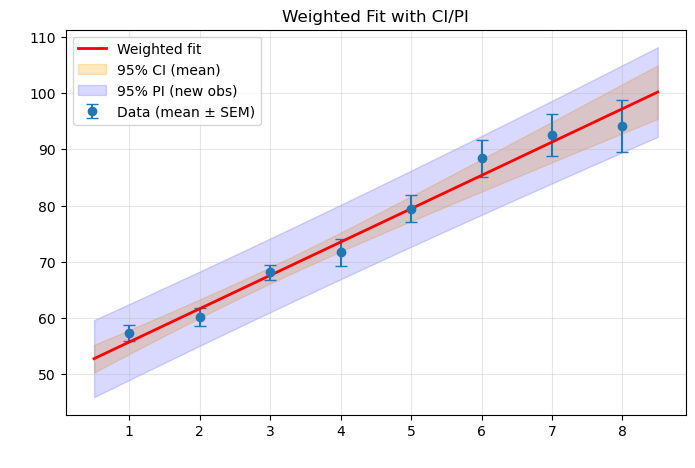

In [33]:
plt.figure(figsize=(8,5))

# plt.errorbar( ) #add code for data points with errorbars
# plt.plot( ) # add code for the best fit line (in red)

plt.errorbar(x, y, yerr=sigma, fmt='o', capsize=4, label='Data (mean ± SEM)')
plt.plot(x_grid, y_fit, 'r-', lw=2, label='Weighted fit')

plt.fill_between(x_grid, y_ci_low, y_ci_high, color='orange', alpha=0.25, label='95% CI (mean)') #confidence interval
plt.fill_between(x_grid, y_pi_low, y_pi_high, color='blue', alpha=0.15, label='95% PI (new obs)') #prediction interval

plt.xlabel(' ') 
plt.ylabel(' ')

plt.title('Weighted Fit with CI/PI')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

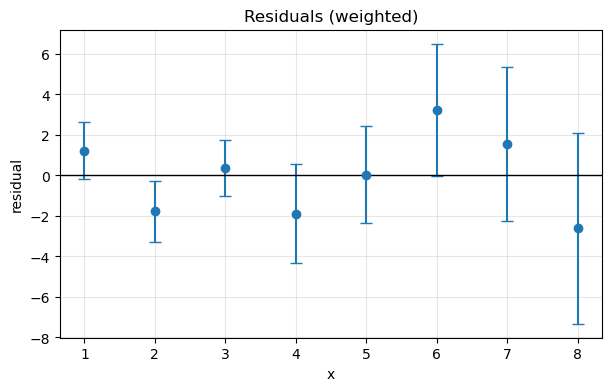

In [34]:
plt.figure(figsize=(7,4))
plt.errorbar(x, res, yerr=sigma, fmt='o', capsize=4)
plt.axhline(0, color='k', lw=1)
plt.xlabel('x'); plt.ylabel('residual'); plt.title('Residuals (weighted)')
plt.grid(True, alpha=0.3); plt.show()

## 14. How did the confidence interval change when more data was added? 